## Health Insurance Marketplace Data
In this exerice, I am doing some exploratory analysis (4 tasks) on the health insurance marketplace data. The *Health Insurance Marketplace Public Use Files* contain data on health and dental plans offered to individuals and small businesses through the US Health Insurance Marketplace. 
This data was originally prepared and released by the [Centers for Medicare & Medicaid Services (CMS)](https://www.cms.gov/). Please read the CMS Disclaimer-User Agreement before using this data. Also, please refer to [Centers for Medicare & Medicaid Services](https://www.cms.gov/cciio/resources/data-resources/marketplace-puf) (CMS) for data dictionaries of the fields in the data tables. 

The data was published in Kaggle by US Department of Health and Human Services. There were some pre-processing steps done to the original data to facilitate analytics. In this exercise, we will use the version sourced from Kaggle. For your convenience, you only need to use the `rate.csv.tiny.zip` file.

In [1]:
# Loading all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configure visualisations
%matplotlib inline

## Task 1 - Data Loading and Auditing

In [2]:
?pd.read_xml

In [3]:
# loading the data, doing an initial exploration of the data, and printing out some samples
#

df = pd.read_csv('rate.csv.tiny.zip')
df

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2015,AZ,98971,HIOS,7,2014-12-10 11:54:40,98971,35-1665915,2015-01-01,2015-12-31,...,418.16,439.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629
1,2015,FL,16842,HIOS,6,2015-05-20 14:11:45,16842,59-2015694,2015-01-01,2015-12-31,...,271.34,321.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2612
2,2014,LA,19636,HIOS,8,2014-01-21 08:29:49,19636,72-1071369,2014-01-01,2014-12-31,...,609.05,749.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1062
3,2015,OH,28162,SERFF,4,2014-09-11 12:10:19,28162,34-1624818,2015-10-01,2015-12-31,...,34.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
4,2016,IN,33380,HIOS,3,2015-08-26 09:56:12,33380,26-2127080,2016-01-01,2016-12-31,...,465.52,698.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173606,2014,GA,50988,HIOS,5,2013-09-12 11:27:35,50988,86-0307623,2014-01-01,2014-12-31,...,28.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114
3173607,2015,WV,31274,SERFF,10,2015-01-22 16:02:51,31274,55-0624615,2015-01-01,2015-12-31,...,356.81,365.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1918
3173608,2015,IN,33380,HIOS,9,2015-01-20 13:44:26,33380,26-2127080,2015-01-01,2015-12-31,...,703.54,769.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1666
3173609,2014,VA,13756,SERFF,5,2014-01-22 11:51:12,13756,86-0307623,2014-01-01,2014-12-31,...,34.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1299


In [4]:
df.describe()

,BusinessYear,IssuerId,VersionNum,IssuerId2,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
count,3.173611e+06,3.173611e+06,3.173611e+06,3.173611e+06,3.173611e+06,1.233207e+06,10311.000000,10311.000000,10311.000000,10311.000000,10311.000000,10311.000000,10311.000000,3.173611e+06
mean,2.015034e+03,5.249007e+04,6.863875e+00,5.249007e+04,4.127613e+03,5.439614e+02,47.920081,49.712898,70.457921,89.048376,72.573304,88.650820,107.290356,6.351940e+03
std,7.942372e-01,2.640836e+04,3.857042e+00,2.640836e+04,6.146090e+04,2.953908e+02,30.261753,29.651531,44.528591,57.422447,48.120429,58.855516,72.820097,9.020217e+03
min,2.014000e+03,1.004600e+04,1.000000e+00,1.004600e+04,0.000000e+00,5.940000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000e+01
25%,2.014000e+03,3.021900e+04,4.000000e+00,3.021900e+04,2.929000e+01,3.392600e+02,26.565000,27.390000,27.870000,29.410000,27.910000,27.910000,29.410000,8.730000e+02
50%,2.015000e+03,4.953200e+04,6.000000e+00,4.953200e+04,2.914900e+02,4.634700e+02,49.540000,50.880000,74.120000,98.420000,76.940000,97.550000,116.580000,2.727000e+03
75%,2.016000e+03,7.652600e+04,9.000000e+00,7.652600e+04,4.790000e+02,6.848800e+02,70.095000,72.330000,107.670000,136.380000,110.590000,135.845000,167.220000,7.576000e+03
max,2.016000e+03,9.996900e+04,2.400000e+01,9.996900e+04,9.999990e+05,6.498950e+03,136.400000,159.140000,251.740000,344.340000,225.670000,318.270000,410.880000,6.349300e+04


In [5]:
# what are the columns in rate.csv?
df.columns

Index(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName', 'VersionNum',
       'ImportDate', 'IssuerId2', 'FederalTIN', 'RateEffectiveDate',
       'RateExpirationDate', 'PlanId', 'RatingAreaId', 'Tobacco', 'Age',
       'IndividualRate', 'IndividualTobaccoRate', 'Couple',
       'PrimarySubscriberAndOneDependent', 'PrimarySubscriberAndTwoDependents',
       'PrimarySubscriberAndThreeOrMoreDependents', 'CoupleAndOneDependent',
       'CoupleAndTwoDependents', 'CoupleAndThreeOrMoreDependents',
       'RowNumber'],
      dtype='object')

In [6]:
# what are the variable types of columns in rate.csv?
df.dtypes

BusinessYear                                   int64
StateCode                                     object
IssuerId                                       int64
SourceName                                    object
VersionNum                                     int64
ImportDate                                    object
IssuerId2                                      int64
FederalTIN                                    object
RateEffectiveDate                             object
RateExpirationDate                            object
PlanId                                        object
RatingAreaId                                  object
Tobacco                                       object
Age                                           object
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
PrimarySubscriberAndOneDependent             float64
PrimarySubscriberAndTwoDependents            f

In [7]:
df.StateCode.value_counts()

StateCode
FL    426205
SC    391130
MI    255256
WI    252354
OH    221386
TX    214921
IN    169086
PA    118543
GA    118214
IL    107704
NC     91914
AZ     87739
VA     81258
AL     49003
OK     46320
NJ     43438
LA     43226
IA     42809
WV     40674
TN     39158
MO     37251
MT     37114
KS     28477
ND     26210
AR     21417
UT     21323
AK     21086
NE     20213
SD     18834
ME     18348
ID     17421
OR     17161
WY     11529
MS     10705
NM      9417
NV      7893
NH      4504
DE      4019
HI       351
Name: count, dtype: int64

### Extracting the following columns from the data, as we will only look into these columns for further tasks.

- `BusinessYear`: Year for which plan provides coverage to enrollees.
- `StateCode`: Two-character state abbreviation indicating the state where the plan is offered.
- `IssuerId`: Five-digit numeric code that identifies the issuer organization in the Health Insurance Oversight System (HIOS).
- `PlanId`: Fourteen-character alpha-numeric code that identifies an insurance plan within HIOS. 
- `Age`: Categorical indicator of whether a subscriber's age is used to determine rate eligibility for the insurance plan.
- `IndividualRate`: Dollar value for the insurance premium cost applicable to a nontobacco user for the insurance plan in a rating area, or to a general subscriber if there is no tobacco preference.
- `IndividualTobaccoRate`: Dollar value for the insurance premium cost applicable to a tobacco user for the insurance plan in a rating area.

Assume we are only interested in the data from 2014, therefore, extracting the 2014 data.

In [8]:
# extract columns of interest
rate = df[['BusinessYear', 'StateCode', 'IssuerId','PlanId','Age','IndividualRate', 'IndividualTobaccoRate']]
rate.head()

,BusinessYear,StateCode,IssuerId,PlanId,Age,IndividualRate,IndividualTobaccoRate
0,2015,AZ,98971,98971AZ0020006,25,418.16,439.07
1,2015,FL,16842,16842FL0120044,42,271.34,321.53
2,2014,LA,19636,19636LA0220005,56,609.05,749.13
3,2015,OH,28162,28162OH0200010,34,34.11,NaN
4,2016,IN,33380,33380IN0020005,59,465.52,698.28


In [9]:
# extract data from the year of interest
rate = rate[rate.BusinessYear == 2014]

# check the shape of the extracted dataframe
rate.shape

(949129, 7)

In [10]:
# check some statistics about the variables (columns in the dataframe)
rate.describe()

,BusinessYear,IssuerId,IndividualRate,IndividualTobaccoRate
count,949129.0,949129.000000,949129.000000,409076.000000
mean,2014.0,50942.830008,13021.135433,560.377404
std,0.0,26054.313142,111880.168965,335.069784
min,2014.0,10191.000000,0.000000,59.400000
25%,2014.0,30045.000000,32.150000,341.480000
50%,2014.0,49193.000000,296.610000,475.960000
75%,2014.0,71268.000000,480.830000,696.250000
max,2014.0,99969.000000,999999.000000,6498.950000


### Auditing the data column `IndividualRate`. 
Distribution of `IndividualRate` values is shown using boxplot and histogram.

<Axes: >

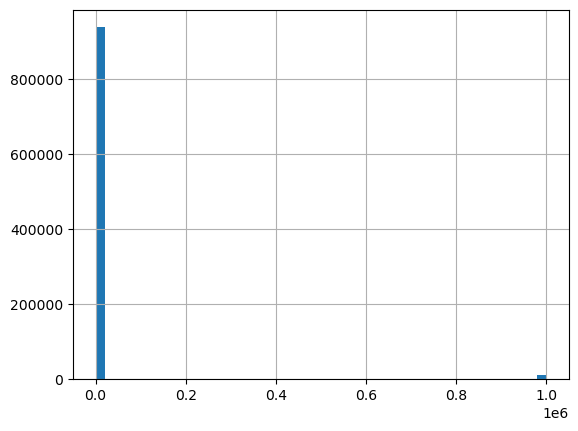

In [11]:
#df['IndividualRate'].describe()
rate['IndividualRate'].hist(bins=50)

<Axes: >

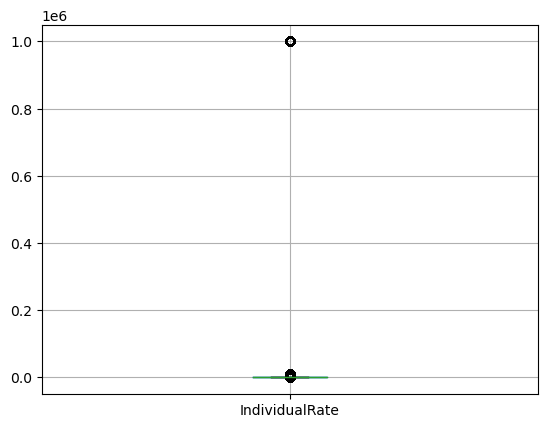

In [12]:
rate.boxplot(column = 'IndividualRate')

<Axes: >

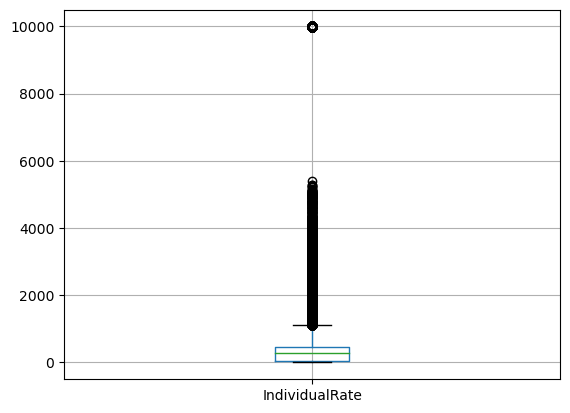

In [13]:
rate[rate['IndividualRate'] < 10000].boxplot(column = 'IndividualRate')

array([[<Axes: title={'center': 'IndividualRate'}>]], dtype=object)

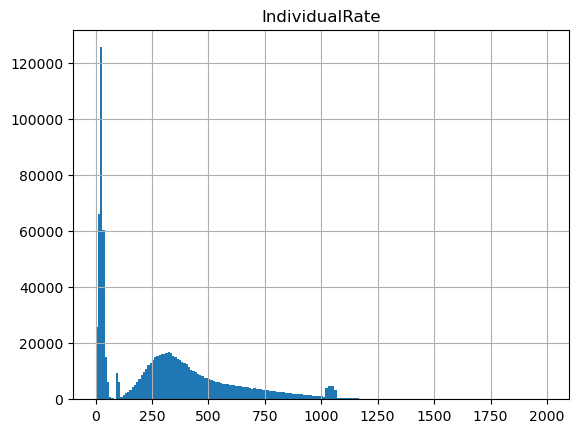

In [14]:
rate[rate['IndividualRate'] < 2000].hist(column = 'IndividualRate', bins = 200)

## Task 2 - Carrier/Issuer and Plans Diversity Across Different States

In this subtask, I investigate the number of carriers and available plan options in different states. To do this, I have calculated some statistics on the number of unique issuers as well as the number of unique plans in different states.

Visualizing results (e.g., using barchart) and communicating my findings, e.g., 
* Which state has the largest/least number of health insurance issuers or plans? 
* Use Google search (or any other information resource you prefer) to investigate whether this is related the population size of the state, e.g. whether there are more plans for where there are larger populations?

### Task 2.1 
Which state has the largest/least number of health insurance issuers or plans?


In [15]:
#states = rate.groupby('StateCode')['IssuerId']

states = rate.groupby('StateCode').agg(issuers = ('IssuerId','nunique'), plans = ('PlanId','nunique'))
print(states)


           issuers  plans
StateCode                
AK               8     86
AL               9     92
AR              10    144
AZ              21    396
DE               9     64
FL              24    415
GA              16    185
IA              11    214
ID               8    149
IL              17    222
IN              11    316
KS               9    105
LA              12    170
ME               6     67
MI              25    350
MO              14    131
MS               6     51
MT               8    108
NC               8    114
ND               9    115
NE              10    156
NH               4     28
NJ              13    167
NM               6     65
OH              21    478
OK              12    188
PA              25    394
SC              11    124
SD               8     78
TN               8    129
TX              27    284
UT              12    122
VA              18    243
WI              22    497
WV               6     60
WY               6     58


In [16]:
states.dtypes

issuers    int64
plans      int64
dtype: object

In [17]:
states.index

Index(['AK', 'AL', 'AR', 'AZ', 'DE', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS',
       'LA', 'ME', 'MI', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'OH', 'OK', 'PA', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'WI', 'WV', 'WY'],
      dtype='object', name='StateCode')

In [18]:
states = states.reset_index()
states

,StateCode,issuers,plans
0,AK,8,86
1,AL,9,92
2,AR,10,144
3,AZ,21,396
4,DE,9,64
5,FL,24,415
6,GA,16,185
7,IA,11,214
8,ID,8,149
9,IL,17,222


In [19]:
# sort the dataframe by number of issuer and number of plans

states.sort_values(by=['issuers','plans'])

,StateCode,issuers,plans
21,NH,4,28
16,MS,6,51
35,WY,6,58
34,WV,6,60
23,NM,6,65
13,ME,6,67
28,SD,8,78
0,AK,8,86
17,MT,8,108
18,NC,8,114


In [20]:
states1 = rate.groupby(['StateCode','IssuerId'])['PlanId']
states1.count()

StateCode  IssuerId
AK         21989         40
           38344       2506
           38536        115
           42507         74
           45858        122
                       ... 
WY         37378        108
           38921         69
           47731        145
           53189        876
           83964        210
Name: PlanId, Length: 450, dtype: int64

In [21]:
# above task can also be done by:

states2 = rate.groupby(['StateCode','IssuerId']).agg(total = ('PlanId','count'))
states2

total
StateCode IssuerId       
AK        21989        40
          38344      2506
          38536       115
          42507        74
          45858       122
...                   ...
WY        37378       108
          38921        69
          47731       145
          53189       876
          83964       210

[450 rows x 1 columns]

In [22]:
states3 = rate.groupby('IssuerId').agg(total = ('PlanId','count'))
states3

,total
IssuerId,
10191,2654
10204,153
10207,305
11083,1515
11103,388
...,...
99663,813
99708,868
99734,53


### Task 2.2
Whether there are more plans for states with larger populations? [*Hint: you might find the data in 'nst-est2016-01.xlsx', which contains the population by state for the year of 2016, to be useful. I provided a reformatted version, the original version can be found [here](https://www2.census.gov/programs-surveys/popest/tables/2010-2016/state/totals/).*]

In [23]:
# reading population data

population_df = pd.read_excel('nst-est2016-01.xlsx', sheet_name='NST01')
population_df.sample(10)

/Users/ujjwalkatyal/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,State,2010,2011,2012,2013,2014,2015,2016
20,MD,5788584,5843603,5889651,5931129,5967295,5994983,6016447
17,KY,4348662,4369354,4384799,4400477,4413057,4424611,4436974
27,NE,1830051,1842283,1855725,1868559,1881145,1893765,1907116
23,MN,5311147,5348562,5380285,5418521,5453109,5482435,5519952
38,PA,12712343,12744293,12771854,12781338,12790565,12791904,12784227
51,PR,3721525,3678732,3634488,3593077,3534874,3473181,3411307
26,MT,990641,997821,1005196,1014314,1022867,1032073,1042520
2,AZ,6408312,6467163,6549634,6624617,6719993,6817565,6931071
49,WI,5690263,5709640,5726177,5742854,5758377,5767891,5778708
50,WY,564513,567725,576765,582684,583642,586555,585501


In [24]:
# extract the data of interest

population_df = population_df[['State',2014]]
population_df.columns = ['State','Population']
population_df

,State,Population
0,AL,4843214
1,AK,736705
2,AZ,6719993
3,AR,2966912
4,CA,38680810
5,CO,5349648
6,CT,3591873
7,DE,934948
8,DC,659005
9,FL,19888741


In [25]:
# merge two dataframes to compare population and issuers/plans

states_df = states.merge(population_df, left_on = 'StateCode', right_on = 'State')
states_df.head()

,StateCode,issuers,plans,State,Population
0,AK,8,86,AK,736705
1,AL,9,92,AL,4843214
2,AR,10,144,AR,2966912
3,AZ,21,396,AZ,6719993
4,DE,9,64,DE,934948


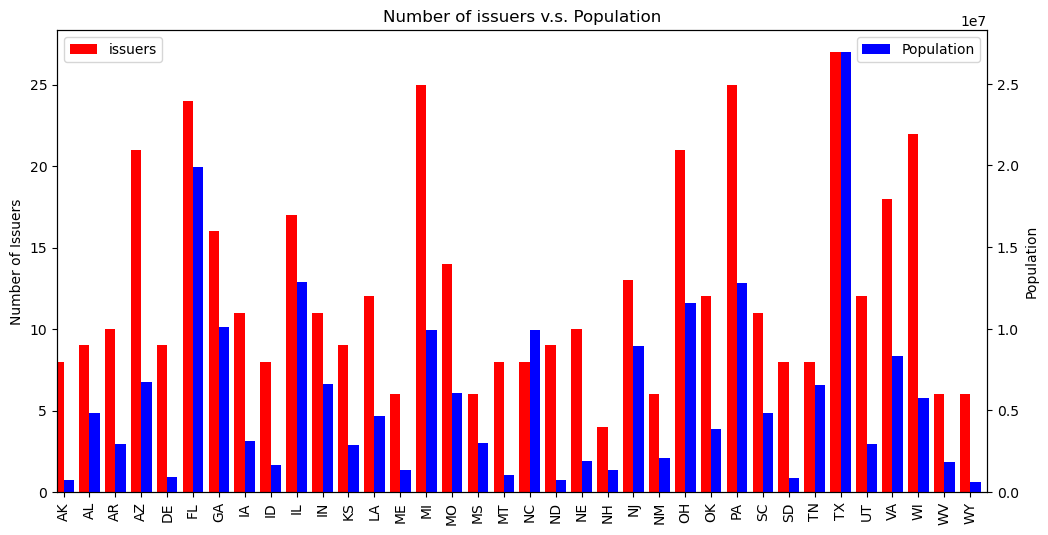

In [26]:
# Plot along the number of issuers and population side by side

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes, 111 means 1x1 grid, first subplot
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4 # define the width of the bar

states_df.issuers.plot(kind='bar', color='red', ax=ax, width=width, position=1,figsize=(12,6))
states_df.Population.plot(kind='bar', color='blue', ax=ax2, width=width,position=0, figsize=(12,6))

ax.set_xticklabels(states_df.State)
ax.set_ylabel('Number of Issuers')
ax.legend(loc = 'upper left')
ax2.set_ylabel('Population')
ax2.legend(loc = 'upper right')
plt.title('Number of issuers v.s. Population')
plt.show()

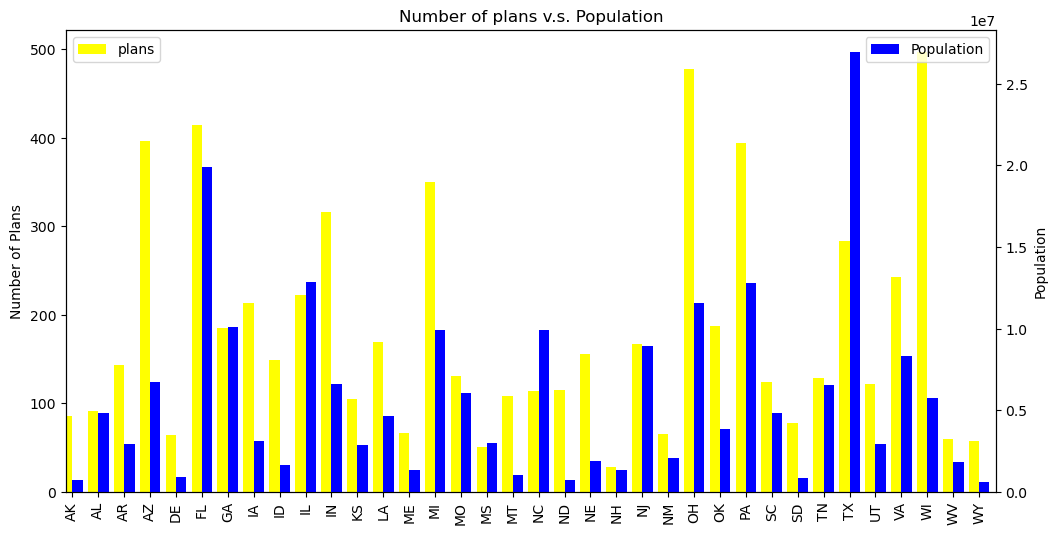

In [27]:
# Plot along the number of plans and population side by side

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes, 111 means 1x1 grid, first subplot
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4 # define the width of the bar

states_df.plans.plot(kind='bar', color='yellow', ax=ax, width=width, position=1,figsize=(12,6))
states_df.Population.plot(kind='bar', color='blue', ax=ax2, width=width,position=0, figsize=(12,6))

ax.set_xticklabels(states_df.State)
ax.set_ylabel('Number of Plans')
ax.legend(loc = 'upper left')
ax2.set_ylabel('Population')
ax2.legend(loc = 'upper right')
plt.title('Number of plans v.s. Population')
plt.show()

## Task 3:  Carrier/Issuer and Plans Availability of Non-smoker vs. Smoker Across Different States

* How many issuers offer plans to non-smokers vs. smokers across different states? And,
* How about the number of available plans for non-smokers vs. smokers across different states?
* Do all states provided plans for tobacco users?

Note that non-smokers are paying on the `IndividualRate`, while smokers/tobacco users will need to pay the `IndividualTobaccoRate`. [*Hint: Therefore, a plan is available to a non-smoker only if the `IndividualRate` has an entry (not NaN, nor an invalid entry). Similarly, a plan is available to a smoker only if the `IndividualTobaccoRate` is valid. So we'll have to see how many plans contain valid values in each case.*]

### Task 3.1
How many issuers offer plans to non-smokers vs. smokers across different states?

In [28]:
rate.IndividualTobaccoRate.isna().sum()


540053

In [29]:
rate['Smoker'] = rate['IndividualTobaccoRate'].apply(lambda x: True if x==x else False)
rate['Smoker'].value_counts()

Smoker
False    540053
True     409076
Name: count, dtype: int64

In [30]:
rate.IndividualRate.isna().sum()

0

In [31]:
# assuming the plan is not available for non-smokers if individual rate is more than 9999.0

rate['Non-smoker'] = rate['IndividualRate'].apply(lambda x: True if x<9999.0 else False)
rate['Non-smoker'].value_counts()

Non-smoker
True     935424
False     13705
Name: count, dtype: int64

In [32]:
rate.head()

,BusinessYear,StateCode,IssuerId,PlanId,Age,IndividualRate,IndividualTobaccoRate,Smoker,Non-smoker
2,2014,LA,19636,19636LA0220005,56,609.05,749.13,True,True
7,2014,IN,50816,50816IN0110050,52,646.50,969.75,True,True
9,2014,FL,30115,30115FL0050001,59,33.47,NaN,False,True
21,2014,SC,49532,49532SC0380009,37,297.64,357.16,True,True
24,2014,IN,85320,85320IN0010060,31,384.82,411.76,True,True


In [33]:
agg_result = rate.groupby('StateCode').apply(lambda x: pd.Series(dict(
Issuers_for_NonSmokers = x[x['Non-smoker']]['IssuerId'].nunique(),
Issuers_for_Smokers = x[x['Smoker']]['IssuerId'].nunique(),
Issuers_for_both = len([s for s in x[x['Smoker']]['IssuerId'].unique() if s in x[x['Non-smoker']]['IssuerId'].unique()]
                          ))))
agg_result

,Issuers_for_NonSmokers,Issuers_for_Smokers,Issuers_for_both
StateCode,,,
AK,8,1,1
AL,9,2,2
AR,10,2,2
AZ,21,8,8
DE,9,3,3
FL,24,11,11
GA,16,5,5
IA,11,4,4
ID,8,4,4


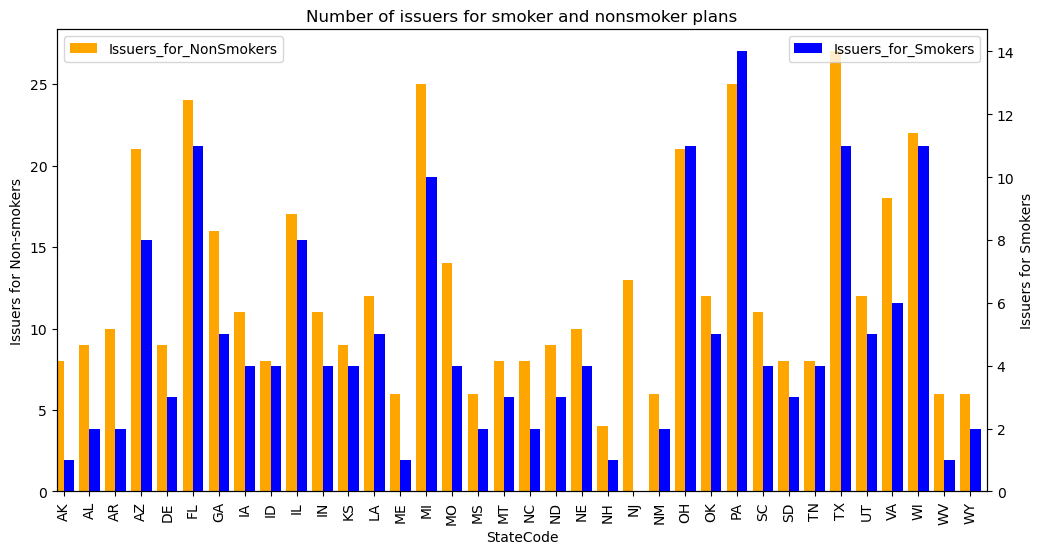

In [34]:
# Plot along the number of plans and population side by side

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes, 111 means 1x1 grid, first subplot
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4 # define the width of the bar

agg_result.Issuers_for_NonSmokers.plot(kind='bar', color='orange', ax=ax, width=width, position=1,figsize=(12,6))
agg_result.Issuers_for_Smokers.plot(kind='bar', color='blue', ax=ax2, width=width,position=0, figsize=(12,6))

ax.set_xticklabels(agg_result.index)
ax.set_ylabel('Issuers for Non-smokers')
ax.legend(loc = 'upper left')
ax2.set_ylabel('Issuers for Smokers')
ax2.legend(loc = 'upper right')
plt.title('Number of issuers for smoker and nonsmoker plans')
plt.show()

### Task 3.2
How many available plans for non-smokers vs. smokers across different states?

In [35]:
agg_result = rate.groupby('StateCode').apply(lambda x: pd.Series(dict(
Plans_for_NonSmokers = x[x['Non-smoker']]['PlanId'].nunique(),
Plans_for_Smokers = x[x['Smoker']]['PlanId'].nunique(),
Plans_for_both = len([s for s in x[x['Smoker']]['PlanId'].unique() if s in x[x['Non-smoker']]['PlanId'].unique()]
                          ))))
agg_result

,Plans_for_NonSmokers,Plans_for_Smokers,Plans_for_both
StateCode,,,
AK,83,24,24
AL,92,17,17
AR,144,60,60
AZ,395,172,172
DE,64,32,32
FL,415,267,267
GA,185,80,80
IA,214,105,105
ID,147,101,101


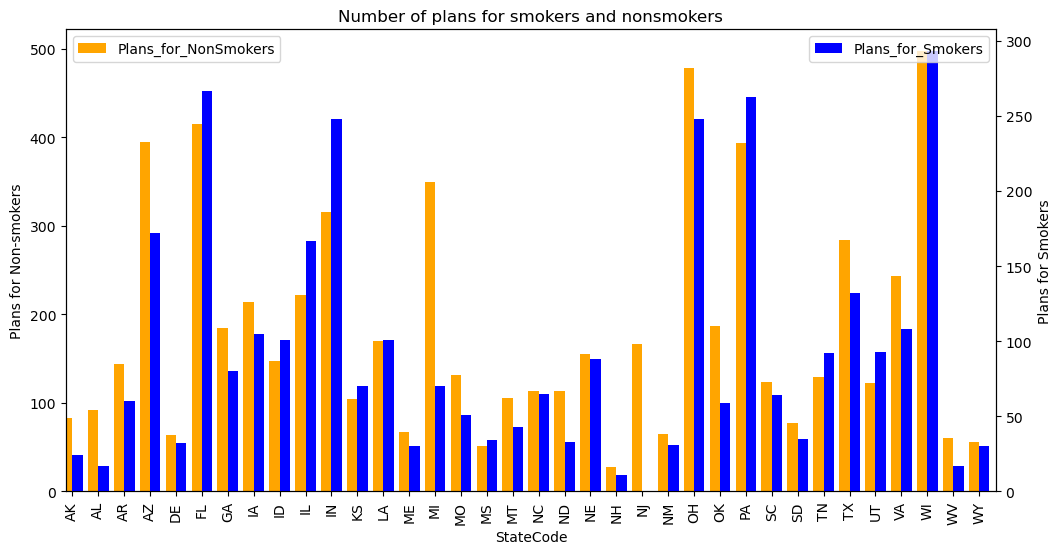

In [36]:
# Plot along the number of plans and population side by side

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes, 111 means 1x1 grid, first subplot
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4 # define the width of the bar

agg_result.Plans_for_NonSmokers.plot(kind='bar', color='orange', ax=ax, width=width, position=1,figsize=(12,6))
agg_result.Plans_for_Smokers.plot(kind='bar', color='blue', ax=ax2, width=width,position=0, figsize=(12,6))

ax.set_xticklabels(agg_result.index)
ax.set_ylabel('Plans for Non-smokers')
ax.legend(loc = 'upper left')
ax2.set_ylabel('Plans for Smokers')
ax2.legend(loc = 'upper right')
plt.title('Number of plans for smokers and nonsmokers')
plt.show()

### Task 3.3
Do all states provide plans for tobacco users?

In [37]:
# from graphs above, we can conclude 'NJ' has 0 issuers/plans for smokers. To double-check:

agg_result.loc['NJ']

Plans_for_NonSmokers    167
Plans_for_Smokers         0
Plans_for_both            0
Name: NJ, dtype: int64

## Task 4: Rates for non-smoker vs. smoker across different states
In this task, our focus is the cost/rates of insurance plans. Let us compare the average insurance rates of non-smokers vs. smokers in different states.

Visualize your results and communicate your findings, e.g., do non-smokers and smokers pay the same rate? If not, in general, what are the differences? Who pays higher rates？

In [38]:
con = (rate.IndividualRate > 0) & (rate.IndividualRate < 999999) # rule out those 0 cost and 999999 cost
average_rates = rate[con].groupby('StateCode').agg(Avg_NonSmoker_rate = ('IndividualRate','mean'), Avg_Smoker_rate = ('IndividualTobaccoRate','mean'))
average_rates

,Avg_NonSmoker_rate,Avg_Smoker_rate
StateCode,,
AK,683.664118,606.660287
AL,292.116689,380.041816
AR,187.881361,525.105899
AZ,382.443180,541.843427
DE,314.308516,532.064088
FL,273.067946,505.538469
GA,279.795165,582.243692
IA,354.051612,528.016333
ID,336.312451,521.410846


<Axes: title={'center': 'Average individual rate for non-smoker vs. smoker plans'}, xlabel='StateCode'>

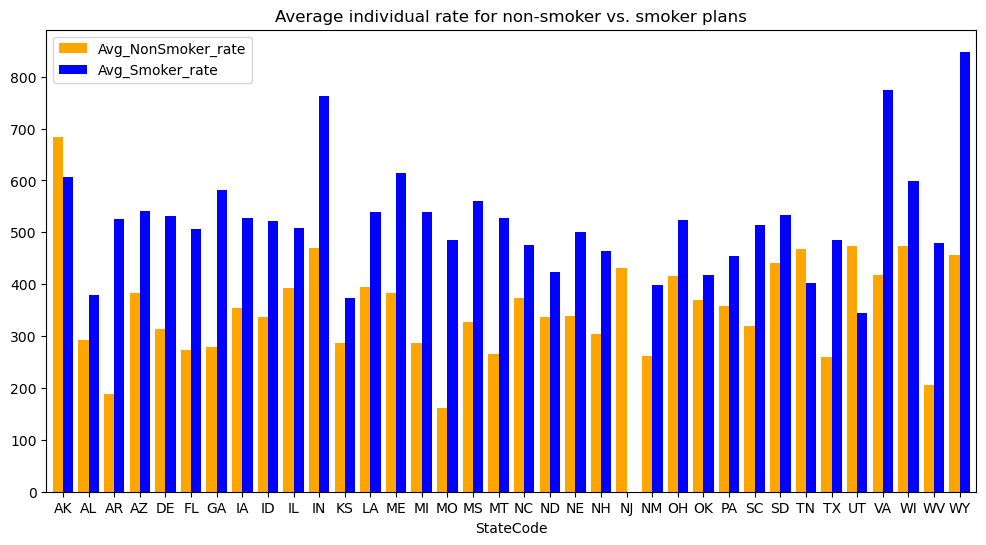

In [39]:
average_rates.plot.bar(
    rot=0,
    width=0.8,
    color=['orange','blue'],
    figsize=(12,6),
    title = "Average individual rate for non-smoker vs. smoker plans")

In [40]:
# Comparing rates for plans available for both smokers and non-smokers makes more sense.

con = (rate.Smoker == True ) & (rate['Non-smoker'] == True)
average_rates = rate[con].groupby('StateCode').agg(Avg_NonSmoker_rate = ('IndividualRate','mean'), Avg_Smoker_rate = ('IndividualTobaccoRate','mean'))
average_rates

,Avg_NonSmoker_rate,Avg_Smoker_rate
StateCode,,
AK,564.793062,606.660287
AL,345.499875,380.041816
AR,437.761672,525.105899
AZ,455.798356,541.843427
DE,465.689726,532.064088
FL,417.501342,505.538469
GA,442.319483,582.243692
IA,387.171724,528.016333
ID,395.687430,521.410846


<Axes: title={'center': 'Average individual rate for non-smoker vs. smoker plans'}, xlabel='StateCode'>

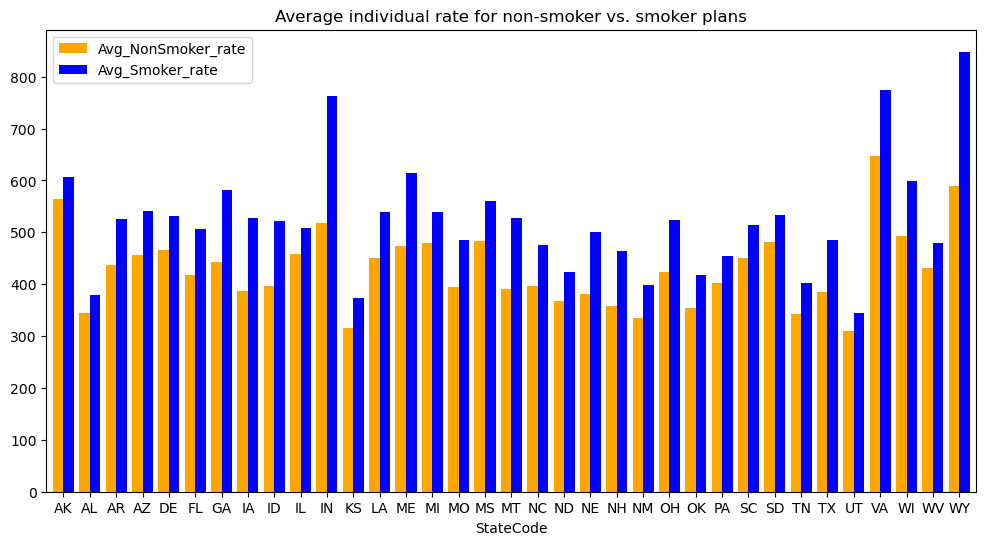

In [41]:
average_rates.plot.bar(
    rot=0,
    width=0.8,
    color=['orange','blue'],
    figsize=(12,6),
    title = "Average individual rate for non-smoker vs. smoker plans")